In [1]:
import sys
sys.path.insert(0, '/home/marcelo/Worklab/MF_Model/Modules')

import mf_if_models as mf
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Customize matplotlib
matplotlib.rcParams.update(
	{
		'text.usetex': False,
		'font.family': 'stixgeneral',
		'mathtext.fontset': 'stix',
		'font.size': 22,
		'ytick.color' : 'black',
		"xtick.color" : 'black',
		'axes.labelcolor' : 'black',
		'axes.edgecolor' : 'black'
	}
)


In [3]:
vec_w_E = np.array([0.1, 1.0, 10])
vec_w_E_label = ["0.1", "1", "10"]
vec_tau_E = np.linspace(0.1, 100, 100)

df_nu = pd.DataFrame({vec_w_E[0]:np.zeros_like(vec_tau_E),
					vec_w_E[1]:np.zeros_like(vec_tau_E),
					vec_w_E[2]:np.zeros_like(vec_tau_E)})


In [4]:
n = 30000

for w_E in vec_w_E:
    print(w_E, end='\t')
    for i, tau_E in enumerate(vec_tau_E):
        print(i, end=' ')
        model = mf.MCoBaIF(w_E = w_E,
						w_I = 0.8,
						tau_E = tau_E,
						tau_I = 10,
						nu_i = 0.005)
        E_I = model.E_I
        V_th = model.V_th

        vec_Vk = np.linspace(E_I, V_th, n + 1)

        df_nu[w_E][i] = model.calculate_firing_rate(vec_Vk)
    
    print()

0.1	0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 
1.0	0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 
10.0	0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 


In [5]:
fRate_data_path = "../../Data/fRate_data/"

df_nu_sim_read = pd.read_csv(f"{fRate_data_path}firing_rate_wE.dat", index_col=0)

df_nu_sim_read

,tauA,0.1,1,10
0,0.100000,0.00,0.0,76.50
1,0.100000,0.00,0.0,77.00
2,0.100000,0.00,0.0,76.80
3,1.109091,0.00,72.5,446.55
4,1.109091,0.00,73.5,445.90
...,...,...,...,...
295,98.990909,454.35,497.4,500.00
296,98.990909,454.40,497.3,500.00
297,100.000000,455.00,497.4,500.00
298,100.000000,455.20,497.4,500.00


In [6]:
index = list(range(0, 200, 3))
df_nu_sim = pd.DataFrame({vec_w_E[0]:np.zeros_like(vec_tau_E),
					vec_w_E[1]:np.zeros_like(vec_tau_E),
					vec_w_E[2]:np.zeros_like(vec_tau_E)})

for w_E, w_E_label in zip(vec_w_E, vec_w_E_label):
	for i in range(len(vec_tau_E)):
		df_nu_sim[w_E][i] = df_nu_sim_read[w_E_label][3*i]

In [7]:
df_error = pd.DataFrame({vec_w_E[0]:np.zeros_like(vec_tau_E),
						vec_w_E[1]:np.zeros_like(vec_tau_E),
						vec_w_E[2]:np.zeros_like(vec_tau_E)})

for w_E in vec_w_E:
	for i, (nu_sim, nu_analyt) in enumerate(zip(df_nu_sim[w_E], df_nu[w_E])):
		df_error[w_E][i] = np.abs(nu_sim - nu_analyt * 1000)

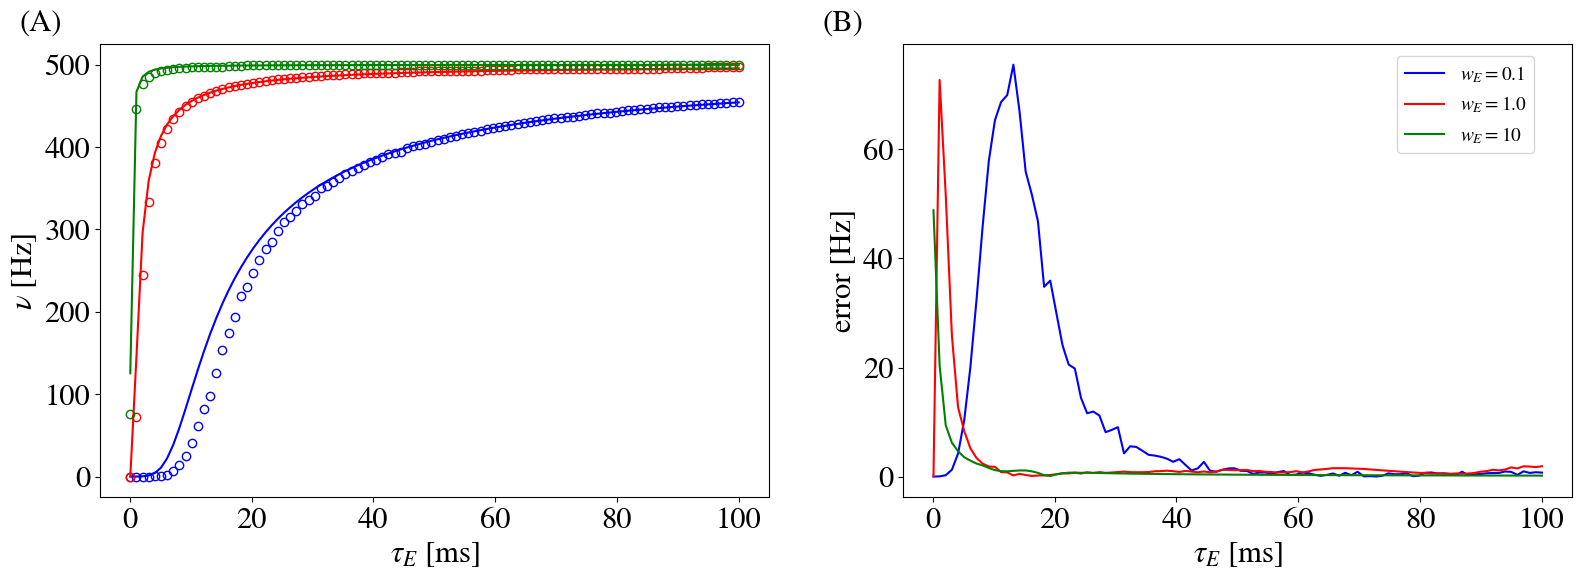

In [9]:
index = list(range(0, 200, 3))

fig, axs = plt.subplots(1, 2, figsize=(19,6), dpi=100, squeeze=False)
axs[0][0].annotate("(A)", xy=(-0.12, 1.03), xycoords="axes fraction")
axs[0][1].annotate("(B)", xy=(-0.12, 1.03), xycoords="axes fraction")

axs[0][0].set_xlabel(r'$\tau_E$ [ms]')
axs[0][1].set_xlabel(r'$\tau_E$ [ms]')
axs[0][0].set_ylabel(r'$\nu$ [Hz]')
axs[0][1].set_ylabel('error [Hz]')

axs[0][0].plot(vec_tau_E, df_nu[vec_w_E[0]]*1000, 'b-', label=r'$w_E = 0.1$')
axs[0][0].plot(vec_tau_E, df_nu_sim[vec_w_E[0]], 'bo', markerfacecolor='none')
axs[0][0].plot(vec_tau_E, df_nu[vec_w_E[1]]*1000, 'r-', label=r'$w_E = 1.0$')
axs[0][0].plot(vec_tau_E, df_nu_sim[vec_w_E[1]], 'ro', markerfacecolor='none')
axs[0][0].plot(vec_tau_E, df_nu[vec_w_E[2]]*1000, 'g-', label=r'$w_E = 10$')
axs[0][0].plot(vec_tau_E, df_nu_sim[vec_w_E[2]], 'go', markerfacecolor='none')

axs[0][1].plot(vec_tau_E, df_error[vec_w_E[0]], 'b-')
axs[0][1].plot(vec_tau_E, df_error[vec_w_E[1]], 'r-')
axs[0][1].plot(vec_tau_E, df_error[vec_w_E[2]], 'g-')
fig.legend(bbox_to_anchor=(0.88, 0.86), loc=1, borderaxespad=0., prop={'size': 14})


In [50]:
fRate_data_path = "../../Data/fRate_data/"
V_data_path = "../../Data/V_data/"

df_mu_1 = pd.read_csv(f"{V_data_path}mean_V_ta_wE.dat", index_col=0)
df_mu_2 = pd.read_csv(f"{V_data_path}mean_V_ta_wE_10.dat", index_col=0)
df_s1 = pd.read_csv(f"{V_data_path}var_V_ta_wE.dat", index_col=0)
df_s2 = pd.read_csv(f"{V_data_path}var_V_ta_wE_10.dat", index_col=0)

In [53]:
df_mu_1['10'] = df_mu_2['10']
df_s1['10'] = df_s2['10']

df_s1

,tauA,0.1,1,10
0,0.10000,0.0,0.0,39.692671
1,0.60201,0.0,0.0,57.892560
2,1.10402,0.0,0.0,32.595426
3,1.60603,0.0,0.0,18.858856
4,2.10804,0.0,0.0,11.605084
...,...,...,...,...
195,97.99196,0.0,0.0,0.002875
196,98.49397,0.0,0.0,0.002646
197,98.99598,0.0,0.0,0.002568
198,99.49799,0.0,0.0,0.002594


In [55]:
df_mu_1.to_csv(f"{V_data_path}mean_V_ta_wE.dat")
df_s1.to_csv(f"{V_data_path}var_V_ta_wE.dat")